# Analysis of biological circuits   

## First circuit. The Feedforward loop

A Feedforward Loop (FFL) is a common and important motif found in biological networks, especially in gene regulatory networks. It consists of three elements (such as genes or proteins) and the connections between them, forming a directed network. In an FFL, one element regulates a second, which in turn regulates a third, and additionally, the first element also directly regulates the third. This creates a loop with two pathways from the first to the third element: a direct one and an indirect one that goes through the second element.

We will use boolean networks where the relationships (activation or inhibition) between the elements of the circuits are logical functions (AND, OR, NOT). For instance, let's define the following FFL:

---
    X inhibits Y
    Y activates Z
    X inhibits Z
---
The representation of this FFL in .bnet notation (a common format for boolean networks) is:

    X, <Boolean function for X>
    Y, !X
    Z, Y and !X
    

Based on the description of your feedforward loop (FFL), where X inhibits Y, Y activates Z, and X also inhibits Z, the `.bnet` representation would look like this:

```
X, <Boolean function for X>
Y, !X
Z, Y and !X
```

In this representation:
- `X` is a node whose behavior or state is determined by some other factors not specified in the FFL. Therefore, its Boolean function will depend on external inputs or conditions, which is why we have `<Boolean function for X>`. If X is always active or its state is constant, we can replace this with `True` or `False` accordingly.
- `Y` is inhibited by `X`, which is represented by `!X`, meaning `Y` is active when `X` is not active.
- `Z` is activated by `Y` and inhibited by `X`. The `and` logic in `Y and !X` means that `Z` is active only when `Y` is active and `X` is not active. 

This setup creates an incoherent type 1 feedforward loop, as the direct regulation (X inhibiting Z) is opposite in effect to the indirect regulation (X inhibiting Y, and Y activating Z).

### Types of FFL
There are different types of FFLs based on the nature of the regulatory interactions (activation or inhibition). The most common types are:

-   Coherent FFL: Where the direct and indirect pathways act in the same way (both activating or both inhibiting) on the target gene.
-   Incoherent FFL: Where the direct and indirect pathways have opposite effects on the target gene.

FFLs are important in signal transduction because they can filter noise. FFLs, especially the type 1 coherent FFL (C1-FFL), are believed to evolve to filter out short spurious signals. This adaptive feature helps in distinguishing between short-lived noise and sustained signals, contributing to more reliable responses.




Prueba de PyBoolNet.

Installation instructtions and manual [here.](https://pyboolnet.readthedocs.io/en/master/installation.html)

## Install library

In [2]:
!pip3 install networkx
!pip3 install git+https://github.com/hklarner/pyboolnet

DEPRECATION: Loading egg at /opt/homebrew/anaconda3/lib/python3.11/site-packages/stringdb-0.1.5-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /opt/homebrew/anaconda3/lib/python3.11/site-packages/stringdb-0.1.5-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Cloning https://github.com/hklarner/pyboolnet to /private/var/folders/mh/39ly_9sn6x3czzxc440sh1ww0000gn/T/pip-req-build-qb5m9tzg
  Running command git clone --filter=blob:none --quiet https://github.com/hklarner/pyboolnet /private/var/folders/mh/39ly_9sn6x3czzxc440sh1ww0000gn/T/pip-req-build-qb5m9tzg
  Resolved https://github.com/hklarner/pyboolnet to commit 0f209cc7ba0d596f790b9584add27485879fe695
  Preparing metadata (setup.py) ... done
  Created wheel for pyboolnet: filename=pyboolnet-3.0.11-py3-none-any.whl size=6021817 sha256

In [3]:
import pyboolnet
from pyboolnet import file_exchange # load and write the network to file
from pyboolnet import interaction_graphs as ig # create the networkx graph
import networkx as nx
import matplotlib.pyplot as plt
from pyboolnet import state_transition_graphs as STGs # To get the state transition graphs
from pyboolnet import attractors as AD # To detect attractors

In Python we represent prime implicants as nested dictionaries and lists. The prime implicants of a network with three components v1, v2, v3 and three update functions f1, f2, f3 that are defined by:

In [4]:
bnet = """
  v1,   v2 & (!v1 | v3)
  v2,   !v3
  v3,   v2 | v1
  """

In [9]:
primes = pyboolnet.repository.primes_from_string(bnet)

AttributeError: module 'pyboolnet' has no attribute 'repository'

In [5]:
primes = file_exchange.bnet2primes(bnet)

save primes as a bnet file. To do so use primes2bnet:

In [ ]:
file_exchange.primes2bnet(primes, "example01.bnet")

'v1,   v2 & v3 | !v1 & v2\nv2,   !v3\nv3,   v2 | v1\n'

# Examine the graph

In [6]:

#bnet = "\n".join(["v1, v1|v3","v2, 1", "v3, v1&!v2 | !v1&v2"])
#primes = FileExchange.bnet2primes(bnet)
G = ig.primes2igraph(primes)

### check edge attributes
for u, v, attr in G.edges(data=True):
    print(f"Edge from {u} to {v} has attributes: {attr}")



G.edges(data=True)




Edge from v1 to v1 has attributes: {'sign': {-1}}
Edge from v1 to v3 has attributes: {'sign': {1}}
Edge from v2 to v1 has attributes: {'sign': {1}}
Edge from v2 to v3 has attributes: {'sign': {1}}
Edge from v3 to v1 has attributes: {'sign': {1}}
Edge from v3 to v2 has attributes: {'sign': {-1}}


OutEdgeDataView([('v1', 'v1', {'sign': {-1}}), ('v1', 'v3', {'sign': {1}}), ('v2', 'v1', {'sign': {1}}), ('v2', 'v3', {'sign': {1}}), ('v3', 'v1', {'sign': {1}}), ('v3', 'v2', {'sign': {-1}})])

In [7]:
## verify edge types

for u, v, attr in G.edges(data=True):
    edge_type = attr.get('sign')
    if edge_type == {1}:
        print(f"Activator edge: {u} -> {v}")
    elif edge_type == {-1}:
        print(f"Inhibitor edge: {u} -| {v}")
    else:
        print(f"Edge {u} -> {v} has unknown or no type")


Inhibitor edge: v1 -| v1
Activator edge: v1 -> v3
Activator edge: v2 -> v1
Activator edge: v2 -> v3
Activator edge: v3 -> v1
Inhibitor edge: v3 -| v2


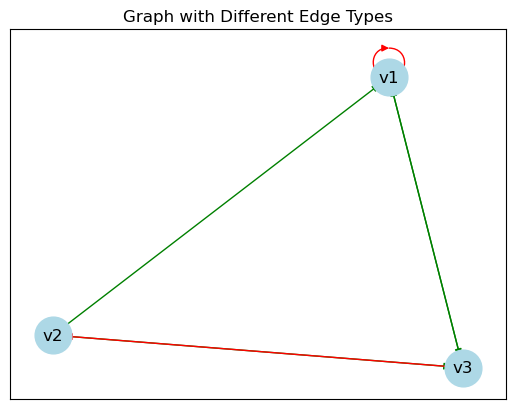

In [8]:
# Separate Edges Based on the 'sign' Attribute
edges_positive = [(u, v) for u, v, d in G.edges(data=True) if d.get('sign') == {1}]
edges_negative = [(u, v) for u, v, d in G.edges(data=True) if d.get('sign') == {-1}]

##  Draw nodes and edges
pos = nx.spring_layout(G)  # You can choose a different layout if you prefer
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)

# Draw positive edges with standard arrowhead
nx.draw_networkx_edges(G, pos, edgelist=edges_positive, edge_color='green', arrows=True)

# Draw negative edges with T-shaped arrowhead
nx.draw_networkx_edges(G, pos, edgelist=edges_negative, edge_color='red', arrows=True, arrowstyle='-|>')

## Add labels and show the plot
nx.draw_networkx_labels(G, pos)
plt.title("Graph with Different Edge Types")
plt.show()


## State Transition graphs
Prime implicants can be used to derive the state transition graph (STG) of a network. To compute it, use the function primes2stg of the module StateTransitionGraphs. It returns an instance of the NetworkX digraph class.

The second argument to primes2stg is either “synchronous” or “asynchronous” for the fully synchronous or the fully asynchronous transition relation, see e.g. [Klarner2015](https://www.frontiersin.org/articles/10.3389/fbioe.2015.00130/full) for a formal definition.

The nodes of an STG are string representations of states, e.g. “110”, see states, [subspaces and paths](https://pyboolnet.readthedocs.io/en/master/manual.html#states-subspaces-paths). You may use state2str to convert a state dictionary into a state string. They are vectors of activities, sorted by component names:

In [ ]:
update = "synchronous"
stg = STGs.primes2stg(primes, update)
list(stg.nodes())[0]

'111'

You may use NetworkX functions on stg, for example [networkx.has_path:](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.has_path.html#networkx.algorithms.shortest_paths.generic.has_path)

In [ ]:
nx.has_path(stg, "100", "111")

True

## Attractor detection
Attractors capture the long-term activities of the components of Boolean networks. Two different types of attractors are possible: either all activities stabilize at some values and the network enters a steady state or at least one component shows sustained oscillations and the network enters a cyclic attractor. Formally, attractors are defined as the inclusion-wise minimal trap sets of a given STG (state transition graph) which is equivalent to the so-called terminal SCCs (strongly connected components)  of the state transition graph. One approach to computing the attractors is to use Tarjan’s algorithm for computing the SCCs of a directed graph, see [Tarjan1972](https://pyboolnet.readthedocs.io/en/master/bibliography.html#tarjan1972) and then to select those SCCs that are terminal, i.e., those for which there is no path to another SCC. This approach is implemented in the function `compute_attractors_tarjan.

In [ ]:
attractors = AD.compute_attractors_tarjan(stg)
#for A in attractors:
#  print([STGs.state2str(x) for x in A])
x = attractors[1]
x[0]
#STGs.state2str(x)


{'000', '001', '010', '101', '111'}

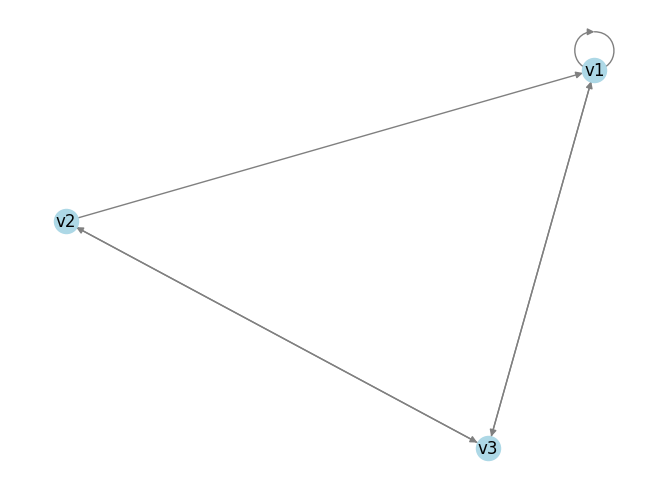

In [ ]:
## plot the graph
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()